## Import modules

In [1]:
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
from pandas_profiling import ProfileReport

In [2]:
#提高jupyternotebook圖形顯示解析度
%config InlineBackend. figure_format = 'retina'

In [3]:
#替圖表顯示中文
sns.set(font=['sans-serif'])
sns.set_style("dark",{"font.sans-serif":['Microsoft JhengHei']})

## Load data 

In [4]:
# need to prepare taipei_A & taipei_B csv 
df_Taipei = pd.read_csv('./Taipei_new_df.csv')
df_Taipei

,鄉鎮市區,交易標的,土地移轉總面積平方公尺,交易年月日,移轉層次,建物型態,主要用途,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元,每坪價格,價格分類
0,文山區,1,4.07,1050418,5,4,見使用執照,1,1,1,5750000,53.454455,5
1,文山區,1,9.54,1050327,7,0,住家用,2,2,1,22600000,64.696159,6
2,文山區,1,11.53,1050331,2,4,住家用,1,0,1,6000000,48.365837,4
3,文山區,2,52.84,1050327,9,0,住家用,3,2,2,29200000,44.061355,4
4,文山區,1,15.69,1050502,3,8,見使用執照,3,2,2,8000000,31.721796,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215442,文山區,2,32.10,1100801,5,0,住家用,3,2,2,35600000,66.893194,6
215443,文山區,2,38.44,1100801,17,0,住家用,3,2,3,45700000,72.105118,7
215444,南港區,2,11.20,1101113,5,0,住商用,1,0,1,16750000,89.611312,8
215445,南港區,2,17.15,1101117,3,0,住商用,2,1,1,25620000,93.507859,9


In [5]:
# 交易年月日轉成交易年份
df_Taipei['交易年份'] = df_Taipei['交易年月日'].astype(str).str[:-4].astype(int) + 1911
df_Taipei

,鄉鎮市區,交易標的,土地移轉總面積平方公尺,交易年月日,移轉層次,建物型態,主要用途,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元,每坪價格,價格分類,交易年份
0,文山區,1,4.07,1050418,5,4,見使用執照,1,1,1,5750000,53.454455,5,2016
1,文山區,1,9.54,1050327,7,0,住家用,2,2,1,22600000,64.696159,6,2016
2,文山區,1,11.53,1050331,2,4,住家用,1,0,1,6000000,48.365837,4,2016
3,文山區,2,52.84,1050327,9,0,住家用,3,2,2,29200000,44.061355,4,2016
4,文山區,1,15.69,1050502,3,8,見使用執照,3,2,2,8000000,31.721796,3,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215442,文山區,2,32.10,1100801,5,0,住家用,3,2,2,35600000,66.893194,6,2021
215443,文山區,2,38.44,1100801,17,0,住家用,3,2,3,45700000,72.105118,7,2021
215444,南港區,2,11.20,1101113,5,0,住商用,1,0,1,16750000,89.611312,8,2021
215445,南港區,2,17.15,1101117,3,0,住商用,2,1,1,25620000,93.507859,9,2021


## Draw Line Plot

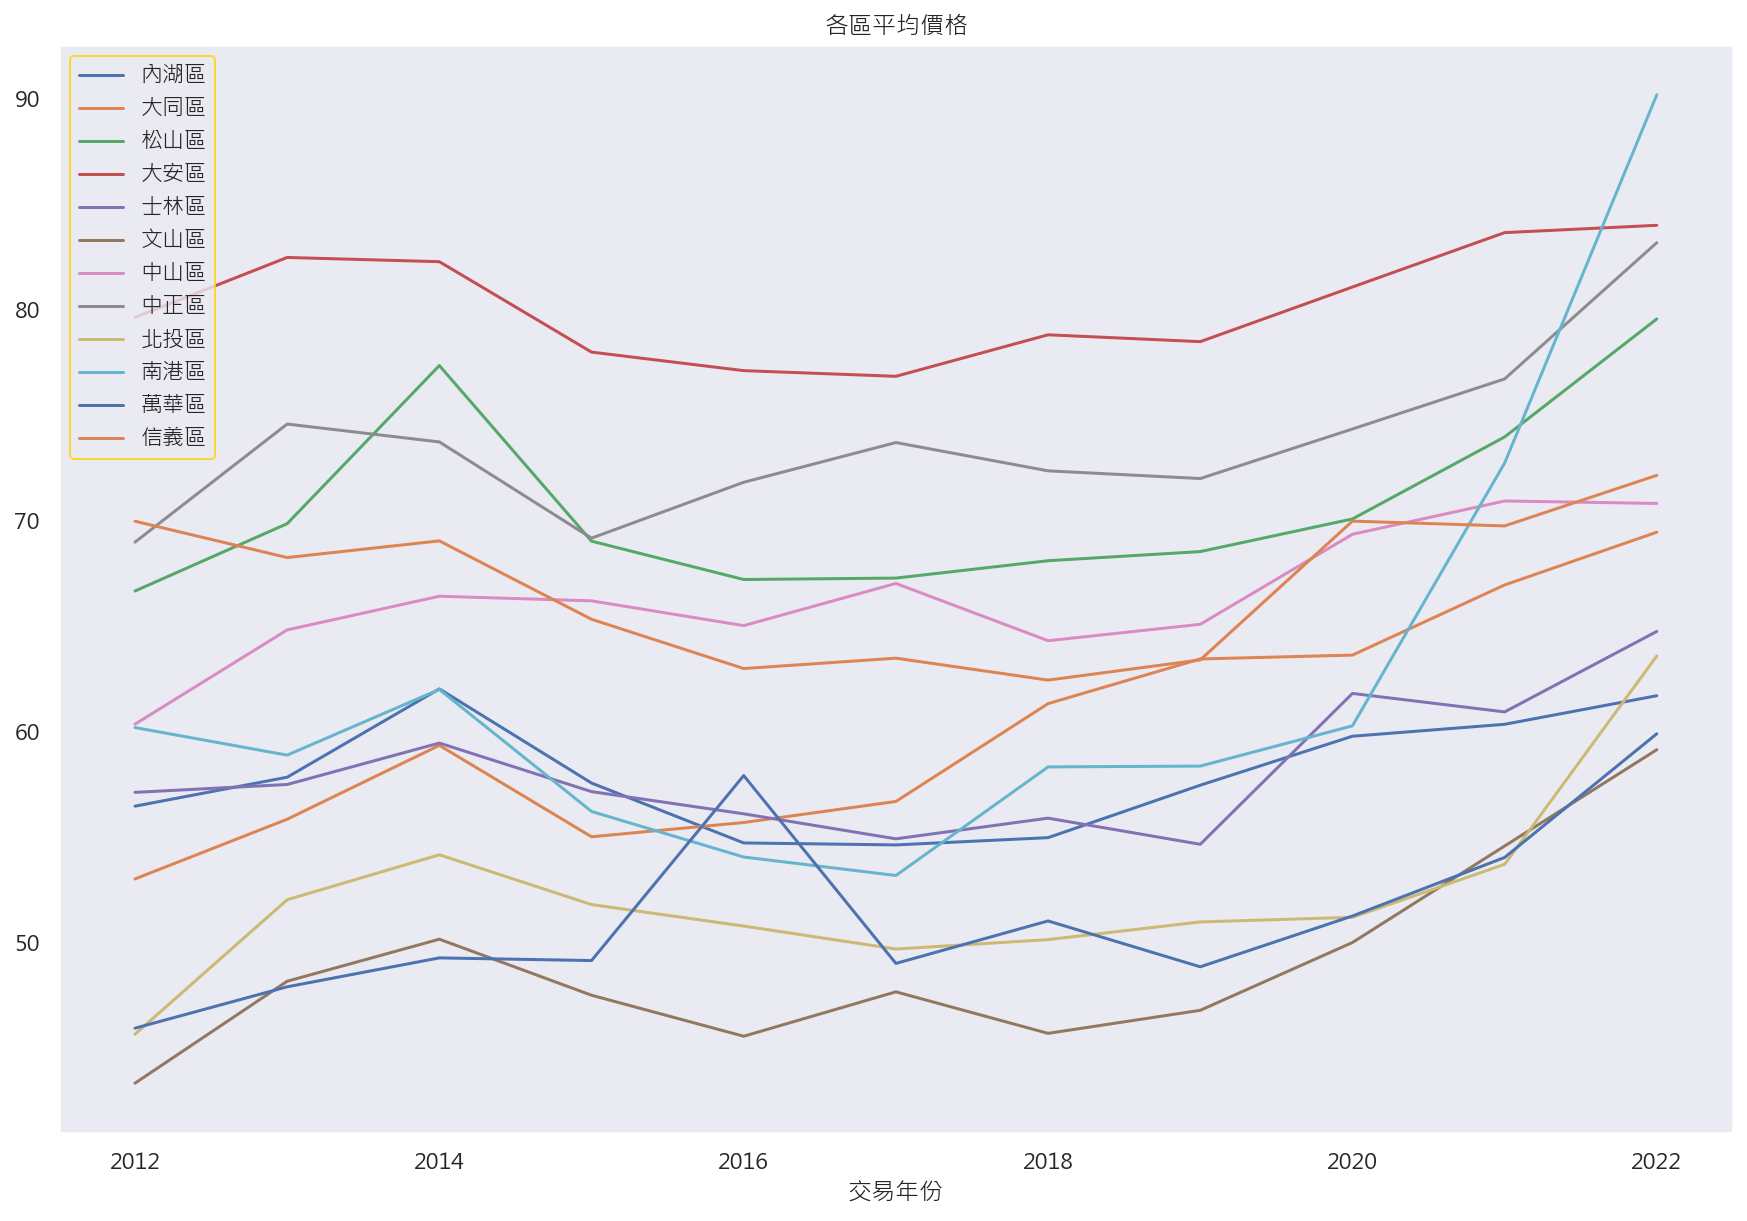

In [8]:
prices = {}
for district in set(df_Taipei['鄉鎮市區']):
    cond = (
        (df_Taipei['主要用途'] == '住家用')
        & (df_Taipei['鄉鎮市區'] == district)
        & (df_Taipei['每坪價格'] < df_Taipei["每坪價格"] .quantile(0.95))
        & (df_Taipei['每坪價格'] > df_Taipei["每坪價格"] .quantile(0.05))
        )
    
    groups = df_Taipei[cond]['交易年份']
    
    prices[district] = df_Taipei[cond]['每坪價格'].astype(float).groupby(groups).mean().loc[2012:]
    
price_history = pd.DataFrame(prices)

price_history.plot(figsize=(15,10),title='各區平均價格') #繪製折線圖
plt.legend(loc='best',edgecolor='gold') # 圖表左上圖例設定
plt.show() # 顯現圖形

# 台北市全區的每年平均房價(單位:萬/坪數)

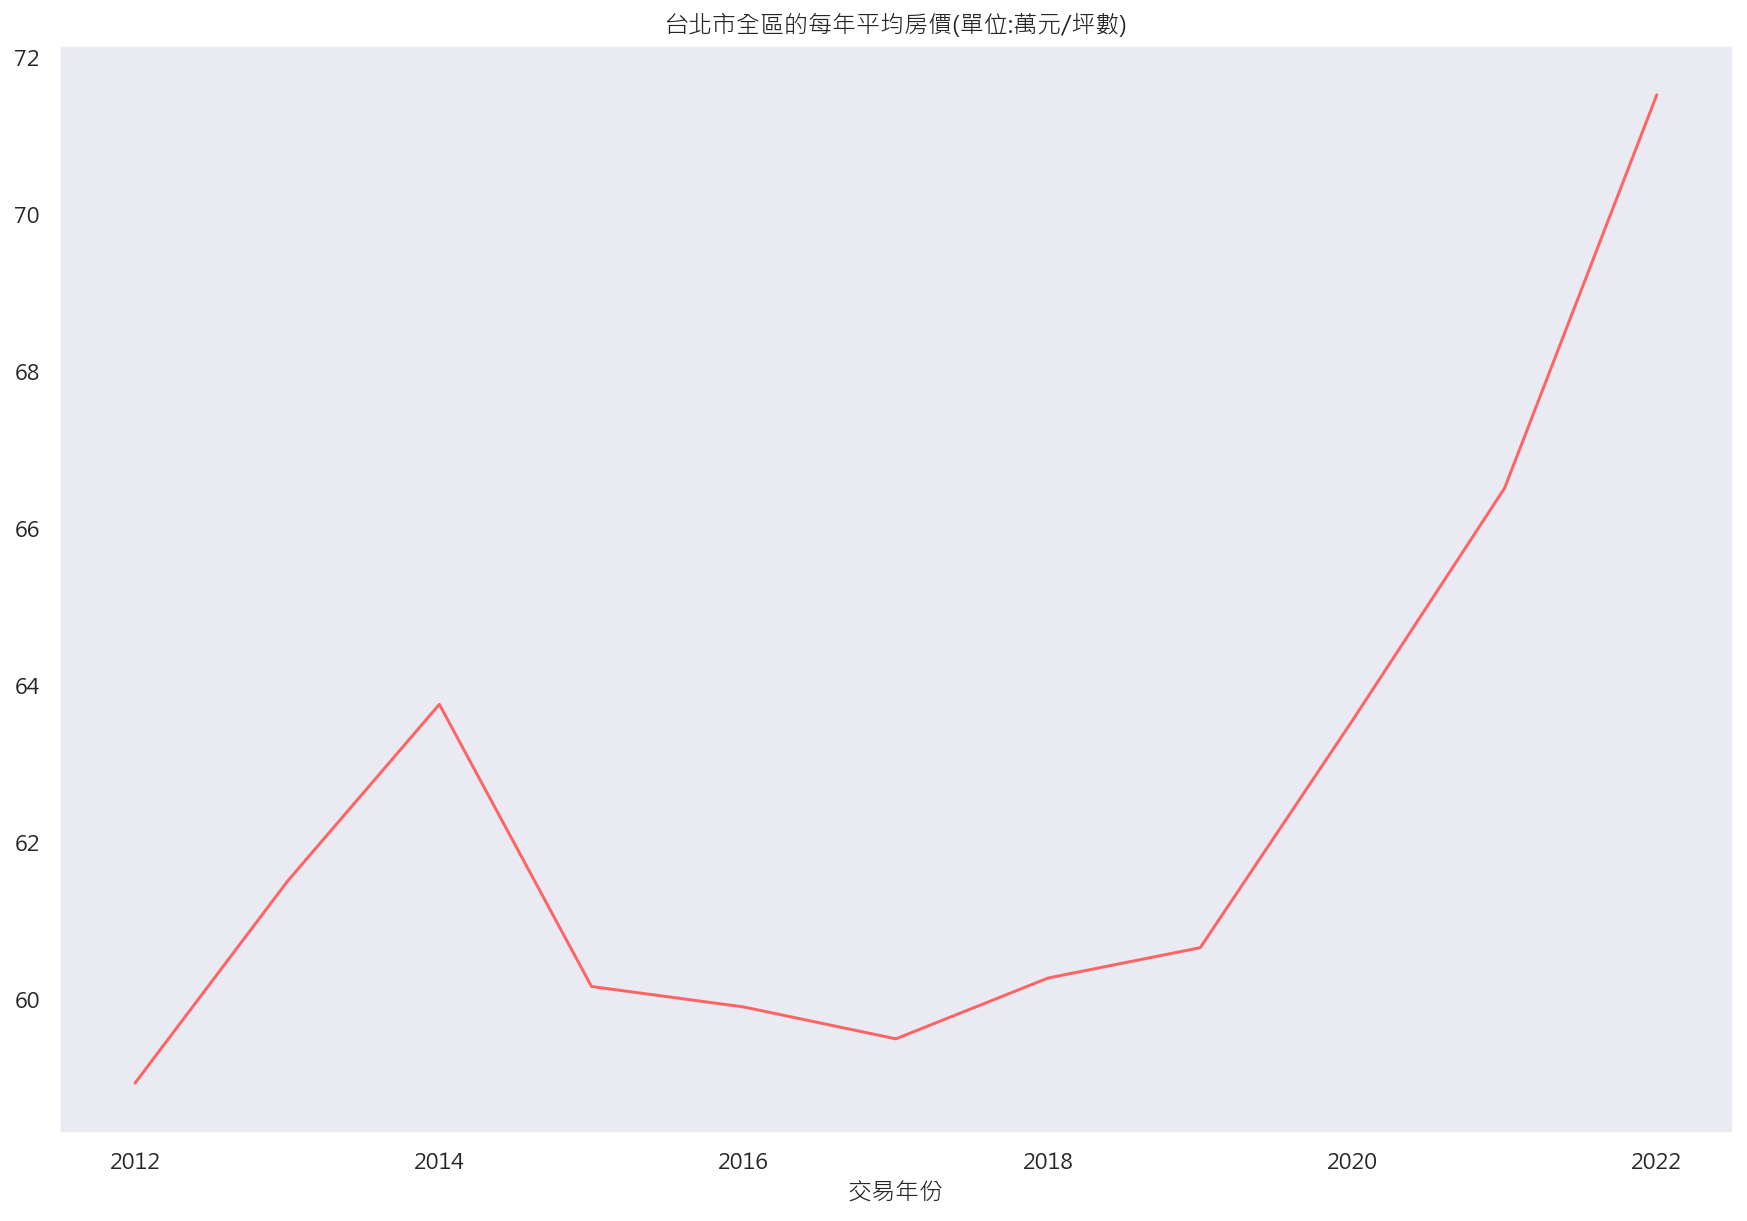

In [9]:
price_history.mean(axis=1).plot.line(figsize=(15,10),title='台北市全區的每年平均房價(單位:萬元/坪數)',color=(255/255,100/255,100/255)) # 繪出平均線
plt.show() # 顯現圖形

## Load Data

In [20]:
df= pd.read_csv('./Taipei_new_df_categorical.csv', engine = 'python') # 只能使用數值格式之dataframe
df.index += 1
df

,鄉鎮市區,交易標的,土地移轉總面積平方公尺,交易年月日,移轉層次,建物型態,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元,每坪價格,價格分類
1,9,1,4.07,1050418,5,4,1,1,1,5750000,53.454455,5
2,9,1,9.54,1050327,7,0,2,2,1,22600000,64.696159,6
3,9,1,11.53,1050331,2,4,1,0,1,6000000,48.365837,4
4,9,2,52.84,1050327,9,0,3,2,2,29200000,44.061355,4
5,9,1,15.69,1050502,3,8,3,2,2,8000000,31.721796,3
...,...,...,...,...,...,...,...,...,...,...,...,...
215443,9,2,32.10,1100801,5,0,3,2,2,35600000,66.893194,6
215444,9,2,38.44,1100801,17,0,3,2,3,45700000,72.105118,7
215445,5,2,11.20,1101113,5,0,1,0,1,16750000,89.611312,8
215446,5,2,17.15,1101117,3,0,2,1,1,25620000,93.507859,9


## To find the correlation among

In [ ]:
# the columns using pearson method 
# Pearson相關係數來衡量兩個數據集合是否在一條線上面，即針對線性數據的相關係數計算，針對非線性 數據便會有誤差
df.corr(method ='pearson')

In [ ]:
# the columns using kendall method 
# 用於反映分類變量相關性的指標，即針對無序序列的相關係數，非常態分佈的數據
df.corr(method ='kendall')

In [ ]:
# the columns using spearman method 
# 非線性的，非常態分析的數據的相關係數
df.corr(method ='spearman')

## Draw HeatMap

<AxesSubplot:>

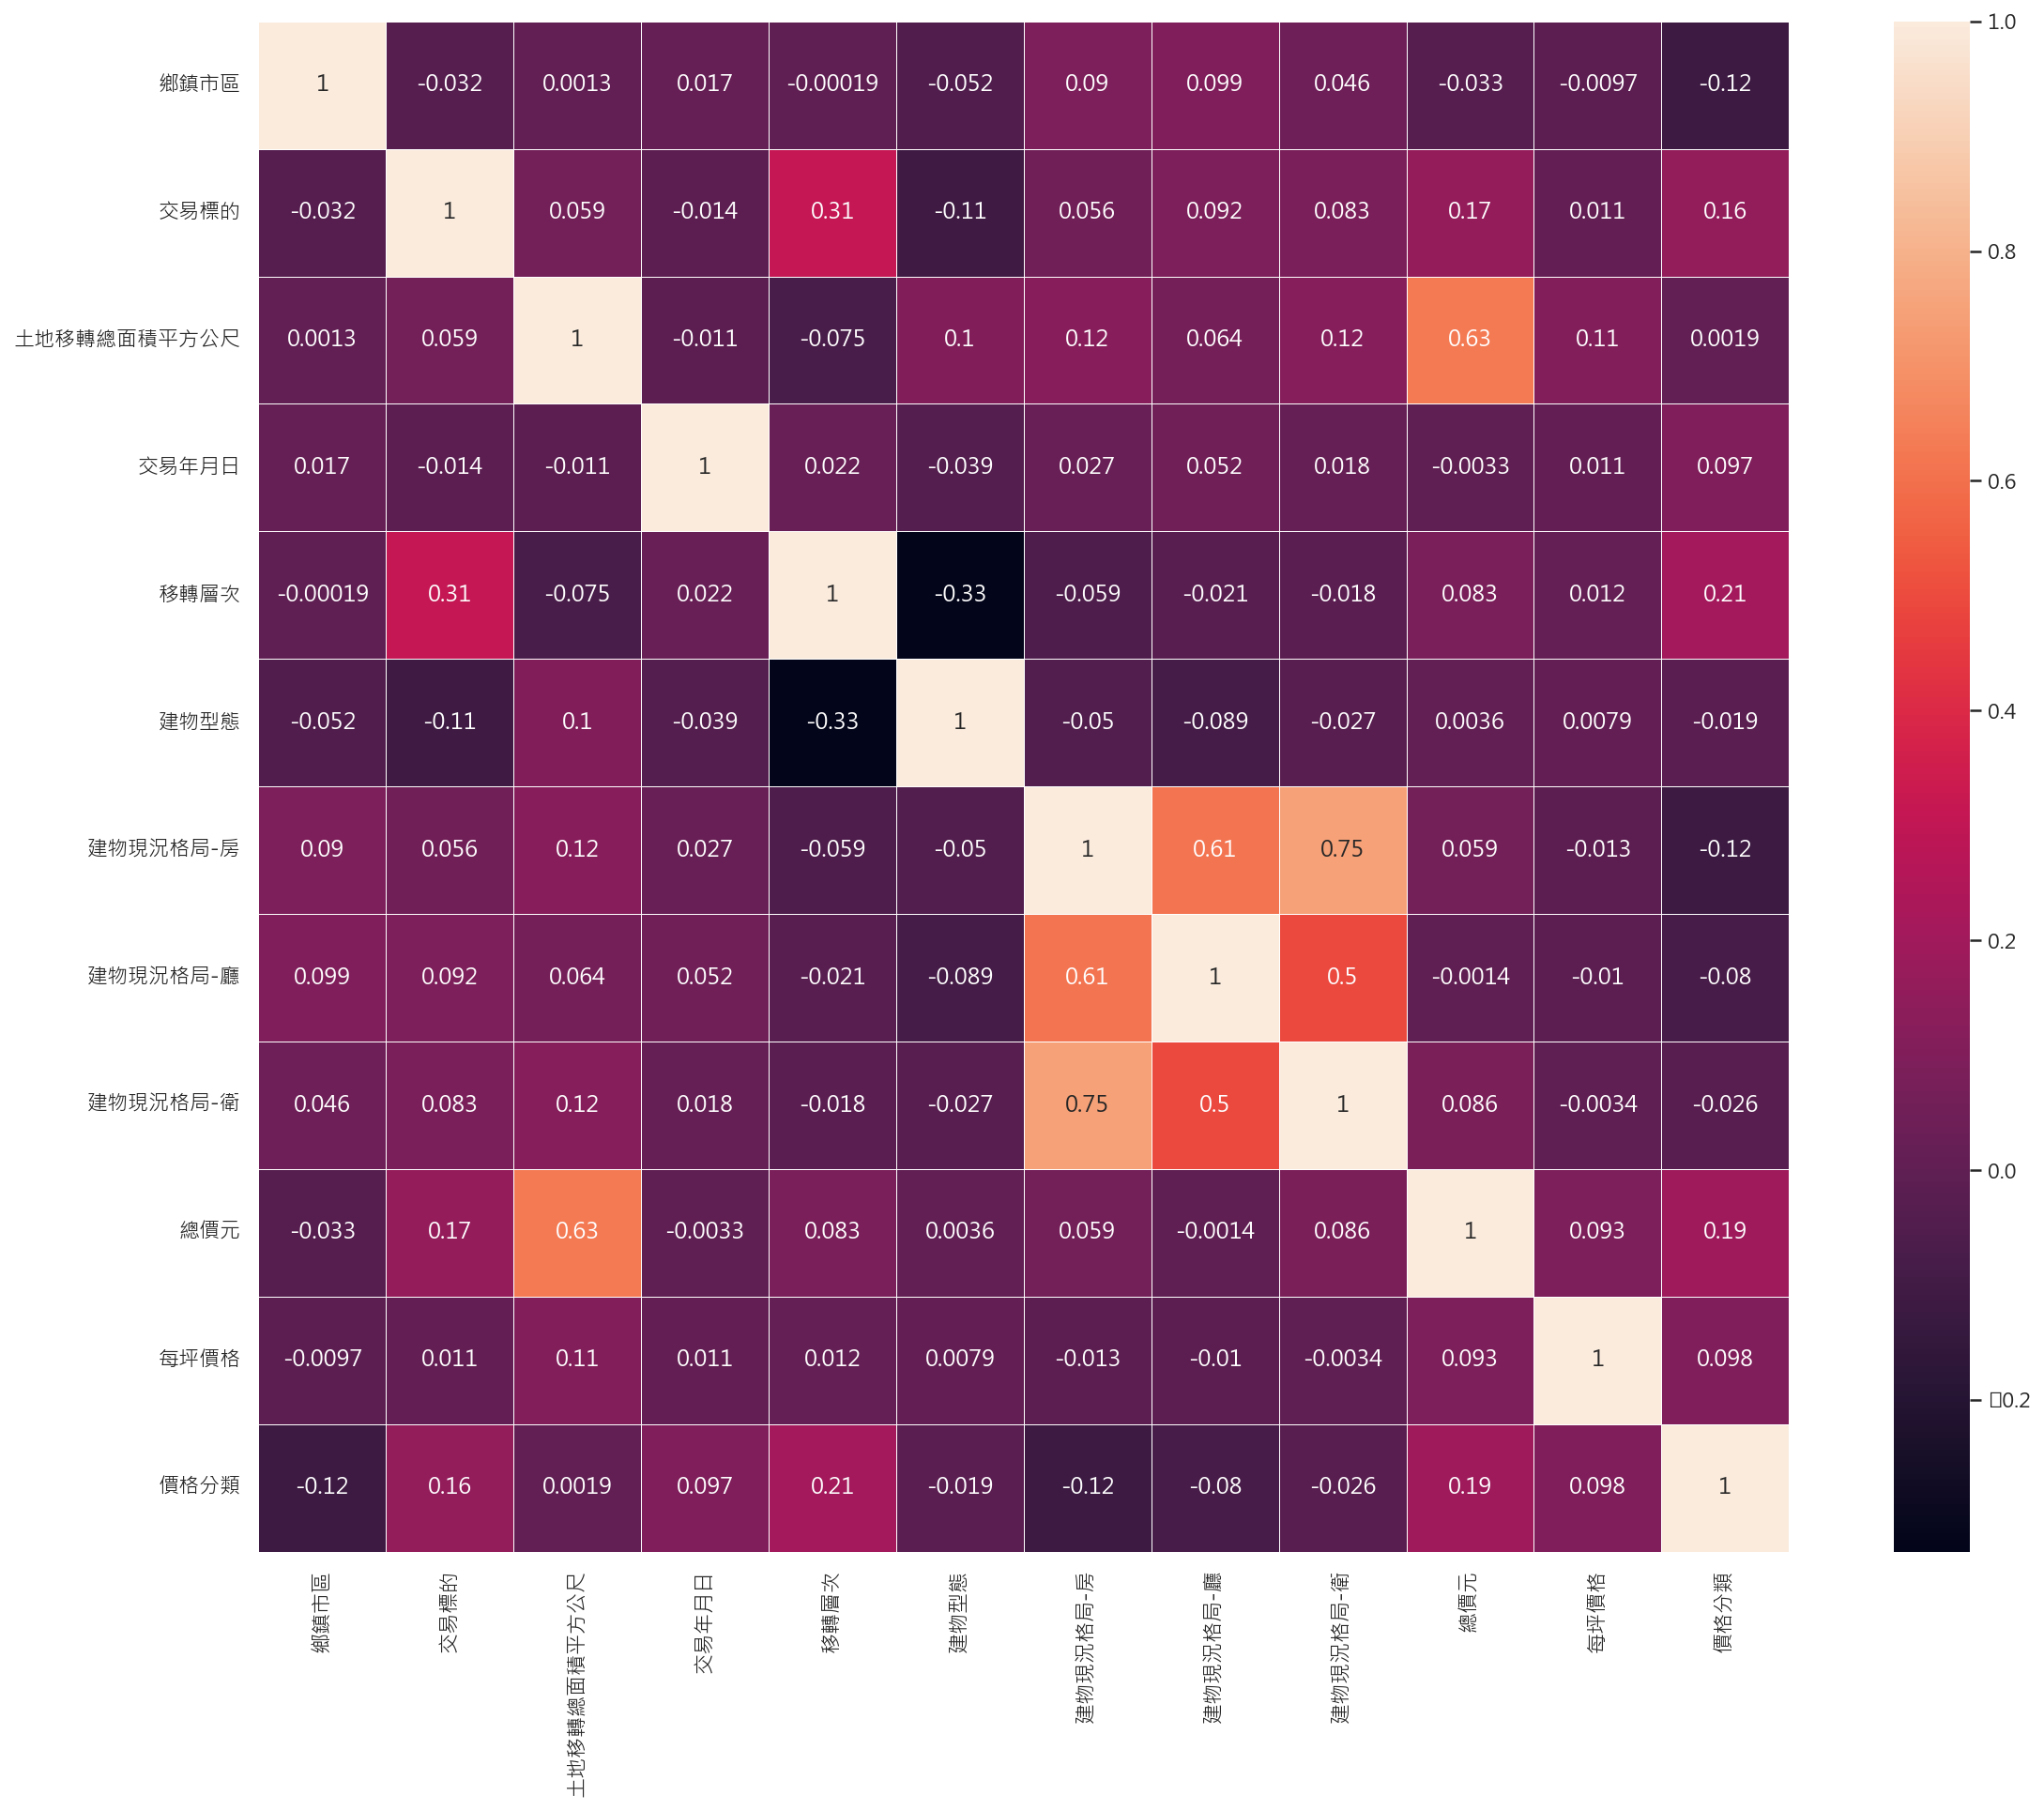

In [13]:
#圖形大小
plt.figure(figsize=(20,15))

# #替圖表顯示中文
# sns.set(font=['sans-serif'])
# sns.set_style("dark",{"font.sans-serif":['Microsoft JhengHei']})

# df.corr(),預設值是pearson
sns.heatmap(df.corr(), linewidths = 0.5, vmax = 1.0, square = True, linecolor = 'white', annot = True) 